# Analysis Gyani

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
sheet_id = '1UWJfqZjEp5cO8ViZvGUiIKKqQEMa4JJsUH0G1LHbCik'

df = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv')
df.head()

,Timestamp,¿Desea participar de la investigación?,Edad,Género,Años de Experiencia en la Clínica,Nivel de Educación MÁXIMO Adquirido,"En caso de haber respondido Terciario u otro, ¿cuál fue su título?",¿Cuál es tu título?,"En caso de haber respondido ""no tengo título universitario"", ¿cuál fue su título máximo adquirido?",Número de Horas por Semana Atendiendo Pacientes (Aproximado),...,¿Usted ha tenido formación universitaria pública o privada?,¿Le parecieron claras todas las preguntas?.1,"En el caso de que haya respondido NO, ¿cuál/es no le parecieron CLARAS y por qué?.1",¿Cree que alguna pregunta es inapropiada?.1,"En el caso de que haya respondido SÍ, ¿cuál/es no le parecieron APROPIADAS y por qué?",¿Considera que se podrían hacer otras preguntas que aporten información valiosa a lo que se intenta estudiar?.1,"En el caso de que haya respondido SÍ, ¿cuál/es?.1",¿Le gustaría agregar otro comentario?.1,Provincia de Residencia,"Considero fundamental el uso del consentimiento informado y lo uso siempre al tomar pacientes nuevos\n\n0 = No sabe/No contesta, 1 = Muy en desacuerdo , 4 = Ni de acuerdo ni en desacuerdo , 7 = Muy de acuerdo"
0,2/24/2023 17:49:30,Sí,41,Femenino,1.2,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,12,...,Privada,No,"Varias, no podria especificar",No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
1,2/24/2023 17:50:27,Sí,26,Femenino,0.2,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,13,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
2,2/24/2023 17:52:36,Sí,27,Femenino,1.0,Carrera de Especialización,NaN,Lic. en Psicología,NaN,30,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Ciudad Autónoma de Buenos Aires (CABA),NaN
3,2/24/2023 17:58:18,Sí,30,Masculino,1.3,Carrera de Especialización,NaN,Lic. en Psicología,NaN,35,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
4,2/24/2023 18:05:06,Sí,26,Masculino,2.0,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,46,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN


In [ ]:
# convierto el valor 8 a 0
df = df.replace(8,0)

In [ ]:
df.shape

(172, 73)

In [ ]:
# renombrar todas las columnas
df = df.rename(columns = {
    '¿Desea participar de la investigación?':'participacion',

    # 1 datos demograficos
      'Edad': 'edad',
       'Género':'genero',
       'Años de Experiencia en la Clínica ':'experiencia_clinica',
       'Nivel de Educación MÁXIMO Adquirido':'educacion',
       'En caso de haber respondido Terciario u otro, ¿cuál fue su título?':'titulo_terciario',
       '¿Cuál es tu título?':'titulo',
       'En caso de haber respondido "no tengo título universitario", ¿cuál fue su título máximo adquirido?':'no_titulo_universitario',
       'Número de Horas por Semana Atendiendo Pacientes (Aproximado)':'horas_semana_pacientes_atendidos',
       'Contexto de Trabajo': 'contexto_trabajo',

       # 1 orientacion teo

       'Orientación Teórica':'orientacion_teo',
       'Indique qué disciplina realiza:':'marco_teo_terapia_basada_arte',
       'Indique qué marco teórico del psicoanálisis sigue usted:':'marco_teo_psa',
       'Indique qué marco teórico utiliza usted en la clínica:':'marco_teo_tcc',
       'Indique qué marco teórico utiliza en la práctica:':'marco_teo_humanista',
       'Indique qué tipo marco teórico utiliza en la práctica:':'marco_teo_eclectico',

       # 2 seccion (influencia factores en la orientacion teorico)
       'Evidencia Científica':'evidencia_cientifica',
       'Experiencia Personal con Consultantes (es decir la propia experiencia ejerciendo)':'experiencia_personal',
       'Entrenamiento Práctico en Clínica':'entrenamiento_clinica',
       'El tratamiento de Preferencia de los Consultantes ':'tratamiento_preferencia_consultantes',
        'Intuición':'intuicion',
       'Terapia Personal':'terapia_personal',

       # 3 seccion (fuentes para mejorar habilidades y efectividad en la clinica)
      'Experiencia Personal con Consultantes':'tratamiento_personal_consultantes',
       'Investigación Empírica con Ensayos Controlados ':'investigacion_empirica_ensayos_controlados',
        'Supervisión':'supervision',
       'Investigación Empírica de Estudios de Caso ':'estudios_de_caso',
        'Discusión con Pares':'discusion_pares',
       'Libros':'libros',
       'Observaciones de Casos Clínicos (por ejemplo en ateneos, prácticas, etc)':'observaciones_casos_clinicos',
       'Medidas de resultado (resultados de escalas, cuestionarios, etc)':'medidas_resultado',
       'Guías o manuales clínicos':'guias_manuales_clinicos',

       # 4 seccion (frases a valorar)
      'Estoy dispuesto a utilizar nuevos y diferentes tipos de terapia desarrollados por investigadores':'apertura_terapias_desarrolladas_por_investigadores',
       'Es mi deber profesional estar al día con los nuevos desarrollos en la investigación clínica (entendiendo a la investigación como un proceso que sigue el método científico)':'actualizacion_info_cientifica',
       'Mi formación clínica hizo énfasis en la investigación (entendiendo a la investigación como un proceso que sigue el método científico)':'formacion_enfasis_investigacion',
       'Mis supervisores requieren/han requerido que use tratamientos basados ​​en la evidencia (es decir, con apoyo del método científico)':'supervisores_terapia_evidencia_requerimiento',
       'Los tratamientos basados ​​en el método científico son eficientes/costo-efectivos ':'tratamientos_cientificos_eficientes',
       'Puedo atraer nuevos consultantes aprendiendo un tratamiento basado en evidencia (como resultado del método científico)':'atraer_consultantes_con_tbe',
       'Es importante incorporar los hallazgos científicos en mi práctica diaria':'hallazgos_cientificos_practica_diaria',
       'Intentaría una nueva terapia incluso si fuera muy diferente de lo que estoy acostumbrado a hacer (es decir muy diferente a lo que ejerzo)':'nueva_terapia_intento',
       'Estoy interesado en aprender tratamientos basados ​​en evidencia (como resultado del método científico)':'interes_aprender_tbe',
       'Los tratamientos que uso con mis consultantes tienen una base empírica (es decir cuentan con apoyo del método científico)':'tratamientos_utilizados_base_empirica',
       'Mis consultantes son más complejos y diversos que los de los ensayos clínicos (provenientes de la investigación científica, ejemplo ensayos aleatorizados y controlados)':'complejidad_consultantes_ensayos_clinicos',
       'Mis consultantes prefieren otros tratamientos que los tratamientos basados ​​en evidencia (como resultado del método científico)':'consultantes_prefieren_otros_tratamientos',
       'La terapia no puede ser manualizada':'terapia_manualizada',
       'Los diagnósticos utilizados en los ensayos clínicos son demasiado simples (ejemplo ensayos aleatorizados y controlados)':'diagnosticos_utilizados_son_simples',
       'Los tratamientos que prefiero no se han probado en un ensayo controlado aleatorio':'tratamientos_preferencia_no_probados_ensayo_controlado',
       'Tengo un enfoque de tratamiento individual para cada consultante':'enfoque_tratamiento_individual',
       'No tengo tiempo para aprender tratamientos basados ​​en evidencia (como resultado del método científico)':'no_tiempo_aprender_tbe',
       'La capacitación en tratamientos basados ​​en evidencia me costaría demasiado dinero (evidencia como resultado del método científico)':'capacitacion_tbe_demasiado_dinero',
       'No sé cuáles tratamientos están basados ​​en evidencia (como resultado del método científico)':'no_saber_tbe',
       'Mi entrenamiento clínico no proporcionó información suficiente sobre tratamientos basados ​​en evidencia (como resultado del método científico)':'entrenamiento_clinico_no_info_tbe',
       'La alianza terapéutica es más importante que aprender cómo hacer una forma específica de psicoterapia':'alianza_terapeutica_mas_importante',
       'La mayoría de las terapias son igualmente efectivas':'terapias_igualmente_efectivas',
       'Mi empleador no tiene los fondos para pagarme una capacitación en tratamientos basados ​​en evidencia (como resultado del método científico)':'empleador_no_fondos_capacitacion_tbe',
       'La experiencia clínica es más importante como guía para el tratamiento que la evidencia científica':'exp_clinica_+imp_que_evidencia_cientifica',

       # feedback
       '¿Le parecieron claras todas las preguntas?':'claridad_preguntas',
       'En el caso de que haya respondido NO, ¿cuál/es no le parecieron CLARAS y por qué?':'claridad_preguntas_comentario',
       '¿Cree que alguna pregunta es inapropiada?':'pregunta_inapropiada',
       'En el caso de que haya respondido NO, ¿cuál/es no le parecieron APROPIADAS y por qué?':'pregunta_inapropiada_comentario',
       '¿Considera que se podrían hacer otras preguntas que aporten información valiosa a lo que se intenta estudiar?':'preguntas_adicionales',
       'En el caso de que haya respondido SÍ, ¿cuál/es?':'preguntas_adicionales_sugerencias',
       '¿Le gustaría agregar otro comentario?':'comentario_extra',
       '¿Usted ha tenido formación universitaria pública o privada?':'formacion_publica_vs_privada',
       '¿Le parecieron claras todas las preguntas?.1':'claridad_preguntas_comentario2',
       'En el caso de que haya respondido NO, ¿cuál/es no le parecieron CLARAS y por qué?.1':'claridad_preguntas_comentario2',
       '¿Cree que alguna pregunta es inapropiada?.1':'pregunta_inapropiada2',
       'En el caso de que haya respondido SÍ, ¿cuál/es no le parecieron APROPIADAS y por qué?':'pregunta_inapropiada_comentario',
       '¿Considera que se podrían hacer otras preguntas que aporten información valiosa a lo que se intenta estudiar?.1':'preguntas_adicionales2',
       'En el caso de que haya respondido SÍ, ¿cuál/es?.1':'preguntas_adicionales_sugerencias2',
       '¿Le gustaría agregar otro comentario?.1':'comentario_extra2',

       # residencia y consentimiento informado
       'Provincia de Residencia':'provincia_residencia',
       'Considero fundamental el uso del consentimiento informado y lo uso siempre al tomar pacientes nuevos\n\n0 = No sabe/No contesta, 1 = Muy en desacuerdo , 4 = Ni de acuerdo ni en desacuerdo , 7 = Muy de acuerdo':'consentimiento_informado'
})
df.head()

,Timestamp,participacion,edad,genero,experiencia_clinica,educacion,titulo_terciario,titulo,no_titulo_universitario,horas_semana_pacientes_atendidos,...,formacion_publica_vs_privada,claridad_preguntas_comentario2,claridad_preguntas_comentario2,pregunta_inapropiada2,pregunta_inapropiada_comentario,preguntas_adicionales2,preguntas_adicionales_sugerencias2,comentario_extra2,provincia_residencia,consentimiento_informado
0,2/24/2023 17:49:30,Sí,41,Femenino,1.2,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,12,...,Privada,No,"Varias, no podria especificar",No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
1,2/24/2023 17:50:27,Sí,26,Femenino,0.2,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,13,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
2,2/24/2023 17:52:36,Sí,27,Femenino,1.0,Carrera de Especialización,NaN,Lic. en Psicología,NaN,30,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Ciudad Autónoma de Buenos Aires (CABA),NaN
3,2/24/2023 17:58:18,Sí,30,Masculino,1.3,Carrera de Especialización,NaN,Lic. en Psicología,NaN,35,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
4,2/24/2023 18:05:06,Sí,26,Masculino,2.0,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,46,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN


## Análisis Exploratorio

In [ ]:
df.provincia_residencia.value_counts()

Provincia de Buenos Aires                                            68
Ciudad Autónoma de Buenos Aires (CABA)                               57
Córdoba                                                              10
La Rioja                                                              9
Mendoza                                                               6
Santa Fe                                                              6
Ciudad Autónoma de Buenos Aires (CABA), Provincia de Buenos Aires     3
Corrientes                                                            2
Misiones                                                              2
Chubut                                                                1
Ciudad Autónoma de Buenos Aires (CABA), Entre Ríos                    1
Entre Ríos                                                            1
Santiago del Estero                                                   1
Catamarca                                                       

## Primera Sección

Datos demográficos y orientación teórica:

* 'edad'

* 'genero'

* 'experiencia_clinica'

* 'educacion'

* 'titulo_terciario'

* 'titulo'

* 'no_titulo_universitario'

* 'horas_semana_pacientes_atendidos'

* 'contexto_trabajo'

* 'orientacion_teo'

* 'marco_teo_terapia_basada_arte'

* 'marco_teo_psa'

* 'marco_teo_tcc'

* 'marco_teo_humanista'

* 'marco_teo_eclectico'

In [ ]:
# edad media
df['edad'].mean()

35.20348837209303

In [ ]:
# media de experiencia clinica
df.experiencia_clinica.mean()

7.009883720930231

In [ ]:
# media de horas por semana en pacientes atendidos
df.horas_semana_pacientes_atendidos.mean()

24.08139534883721

In [ ]:
# educacion
df.educacion.value_counts()

Licenciatura de Grado                                        87
Carrera de Especialización                                   58
Máster                                                       12
Doctorado                                                     6
Posdoctorado                                                  2
Posgrado                                                      2
Psicólogo + Cursos y formacion continua por cuenta propia     1
Residencia completa                                           1
Grado y Posgrados                                             1
Profesorado                                                   1
Varios posgrados con orientación psicoanalitica               1
Name: educacion, dtype: int64

In [ ]:
# educacion publica o privada
df.formacion_publica_vs_privada.value_counts()

Pública    112
Privada     57
Name: formacion_publica_vs_privada, dtype: int64

In [ ]:
# titulos
df.titulo.value_counts()

Lic. en Psicología                   165
Psicólogo                              1
Psicóloga                              1
Lic. en Terapia Ocupacional            1
Doctor en Psicología Clínica           1
Médico o Lic. en Ciencias Médicas      1
Psicologa (UNR)                        1
Lic. en Psicomotricidad                1
Name: titulo, dtype: int64

In [ ]:
# ambito de trabajo
df.contexto_trabajo.value_counts()

Ámbito Privado                                                                       103
Ámbito Privado, Obra Social o Prepaga                                                 28
Ámbito Público (hospital u otro), Ámbito Privado                                      22
Ámbito Público (hospital u otro)                                                       7
Ámbito Público (hospital u otro), Ámbito Privado, Obra Social o Prepaga                4
Obra Social o Prepaga                                                                  2
Particular                                                                             1
Ámbito Privado, Obra Social o Prepaga, Hospital privado que trabaja con prepagas       1
Ámbito Público (hospital u otro), Ámbito Privado, Docencia y clinica                   1
Ámbito Privado,                                                                        1
Ámbito Privado, Fundación sin fines de lucro                                           1
Ámbito Público (hospi

In [ ]:
# orientacion teo
df.orientacion_teo.value_counts()

Terapias Cognitivas/Comportamentales        93
Psicoanálisis                               45
Ecléctico (más de una de estas opciones)    16
Sistémica                                   10
Psicodinámica                                3
Emdr                                         1
Pscicocorporal                               1
Emdr/ cognitiva                              1
Psicocorporal                                1
Humanista                                    1
Name: orientacion_teo, dtype: int64

## Segunda Sección

La influencia de estos factores a la hora de elegir su orientación teórica:

* 'evidencia_cientifica'

* 'experiencia_personal'

* 'entrenamiento_clinica'

* 'tratamiento_preferencia_consultantes'
       
* 'intuicion'

* 'terapia_personal'



**El puntaje es así:**

0 = No sabe/No contesta
1 = Nada Influyente a 7 = Extremadamente Influyente


### PSA

In [ ]:
psa = df[df['orientacion_teo']=='Psicoanálisis']
psa.shape

(45, 73)

In [ ]:
second_section_psa = psa[['evidencia_cientifica','experiencia_personal','entrenamiento_clinica',
                      'tratamiento_preferencia_consultantes','intuicion','terapia_personal']].mean()

### TCC

In [ ]:
tcc = df[df['orientacion_teo']=='Terapias Cognitivas/Comportamentales']
tcc.shape

(93, 73)

In [ ]:
second_section_tcc = tcc[['evidencia_cientifica','experiencia_personal','entrenamiento_clinica',
                      'tratamiento_preferencia_consultantes','intuicion','terapia_personal']].mean()

### ECLECTICO

In [ ]:
eclectico = df[df['orientacion_teo']=='Ecléctico (más de una de estas opciones)']
eclectico.shape

(16, 73)

In [ ]:
second_section_eclectico = eclectico[['evidencia_cientifica','experiencia_personal','entrenamiento_clinica',
                      'tratamiento_preferencia_consultantes','intuicion','terapia_personal']].mean()

### SISTEMICO

In [ ]:
sist = df[df['orientacion_teo'] =='Sistémica']

(10, 73)

In [ ]:
second_section_sist = sist[['evidencia_cientifica','experiencia_personal','entrenamiento_clinica',
                      'tratamiento_preferencia_consultantes','intuicion','terapia_personal']].mean()

# DF para Segunda Section

In [ ]:
df.orientacion_teo.value_counts()

Terapias Cognitivas/Comportamentales        93
Psicoanálisis                               45
Ecléctico (más de una de estas opciones)    16
Sistémica                                   10
Psicodinámica                                3
Emdr                                         1
Pscicocorporal                               1
Emdr/ cognitiva                              1
Psicocorporal                                1
Humanista                                    1
Name: orientacion_teo, dtype: int64

In [ ]:
# dataframe
df2 = {
    'PSA': second_section_psa.round(2),
    'TCC': second_section_tcc.round(2),
    'ECLECTICO': second_section_eclectico.round(2),
    'SISTEMICA': second_section_sist.round(2)
}

df2 = pd.DataFrame(df2)
df2

,PSA,TCC,ECLECTICO,SISTEMICA
evidencia_cientifica,3.49,6.59,4.88,5.6
experiencia_personal,5.89,4.90,4.88,4.9
entrenamiento_clinica,5.73,4.94,4.62,5.6
tratamiento_preferencia_consultantes,3.53,2.90,3.00,3.6
intuicion,2.84,2.59,3.06,2.7
terapia_personal,6.22,3.83,4.00,3.7


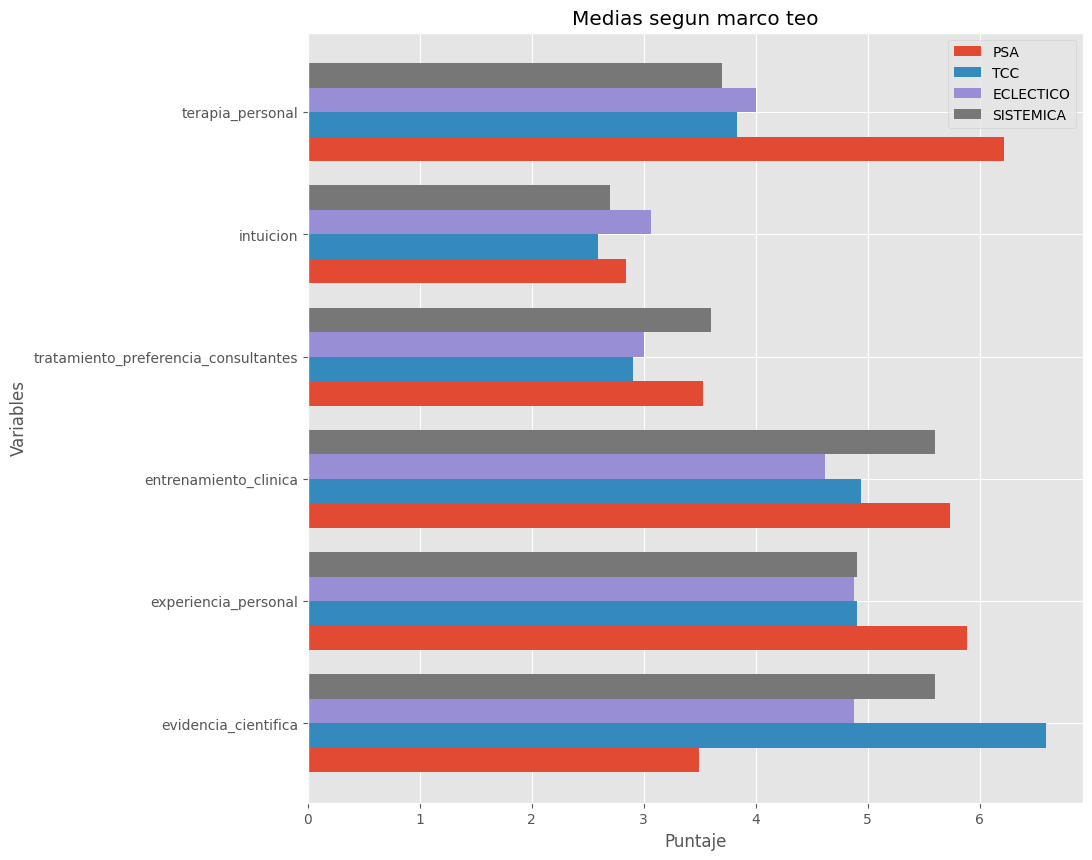

In [ ]:
ax = df2.plot(kind='barh', figsize=(10,10), width=0.8)

ax.set_xlabel('Puntaje')
ax.set_ylabel('Variables')
ax.set_title('Medias segun marco teo')
plt.show()

## Tercer Sección

Fuentes utilizadas para mejorar las habilidades y efectividad en la clínica:

* 'tratamiento_personal_consultantes'

* 'investigacion_empirica_ensayos_controlados'
* 'supervision'

* 'estudios_de_caso'

* 'discusion_pares'

* 'libros'

* 'observaciones_casos_clinicos'

* 'medidas_resultado'

* 'guias_manuales_clinicos'

0 = No sabe/No contesta, 1 = Nunca , 4 = A veces, 7 = Siempre

### PSA

In [ ]:
third_section_psa = psa[['tratamiento_personal_consultantes','investigacion_empirica_ensayos_controlados',\
                         'supervision','estudios_de_caso','discusion_pares','libros','observaciones_casos_clinicos',\
                         'medidas_resultado','guias_manuales_clinicos']].mean()

### TCC

In [ ]:
third_section_tcc = tcc[['tratamiento_personal_consultantes','investigacion_empirica_ensayos_controlados',
                         'supervision','estudios_de_caso','discusion_pares','libros','observaciones_casos_clinicos',
                         'medidas_resultado','guias_manuales_clinicos']].mean()

### ECLECTICO

In [ ]:
third_section_eclectico = eclectico[['tratamiento_personal_consultantes','investigacion_empirica_ensayos_controlados',
                         'supervision','estudios_de_caso','discusion_pares','libros','observaciones_casos_clinicos',
                         'medidas_resultado','guias_manuales_clinicos']].mean()

### SISTEMICA

In [ ]:
third_section_sist = sist[['tratamiento_personal_consultantes','investigacion_empirica_ensayos_controlados',
                         'supervision','estudios_de_caso','discusion_pares','libros','observaciones_casos_clinicos',
                         'medidas_resultado','guias_manuales_clinicos']].mean()

# DF para Tercer Section

In [ ]:
# dataframe for 3rd section
df3 = {
    'PSA': third_section_psa.round(2),
    'TCC': third_section_tcc.round(2),
    'ECLECTICO': third_section_eclectico.round(2),
    'SISTEMICA': third_section_sist.round(2)
}

df3 = pd.DataFrame(df3)
df3

,PSA,TCC,ECLECTICO,SISTEMICA
tratamiento_personal_consultantes,5.98,5.39,4.94,5.7
investigacion_empirica_ensayos_controlados,2.11,4.63,3.44,3.8
supervision,6.18,5.23,5.00,5.2
estudios_de_caso,4.33,4.18,3.25,3.6
discusion_pares,6.24,5.65,5.44,5.0
libros,6.42,6.18,5.44,6.3
observaciones_casos_clinicos,5.96,3.91,3.81,5.9
medidas_resultado,1.96,4.34,3.44,2.9
guias_manuales_clinicos,2.62,5.96,4.88,4.9


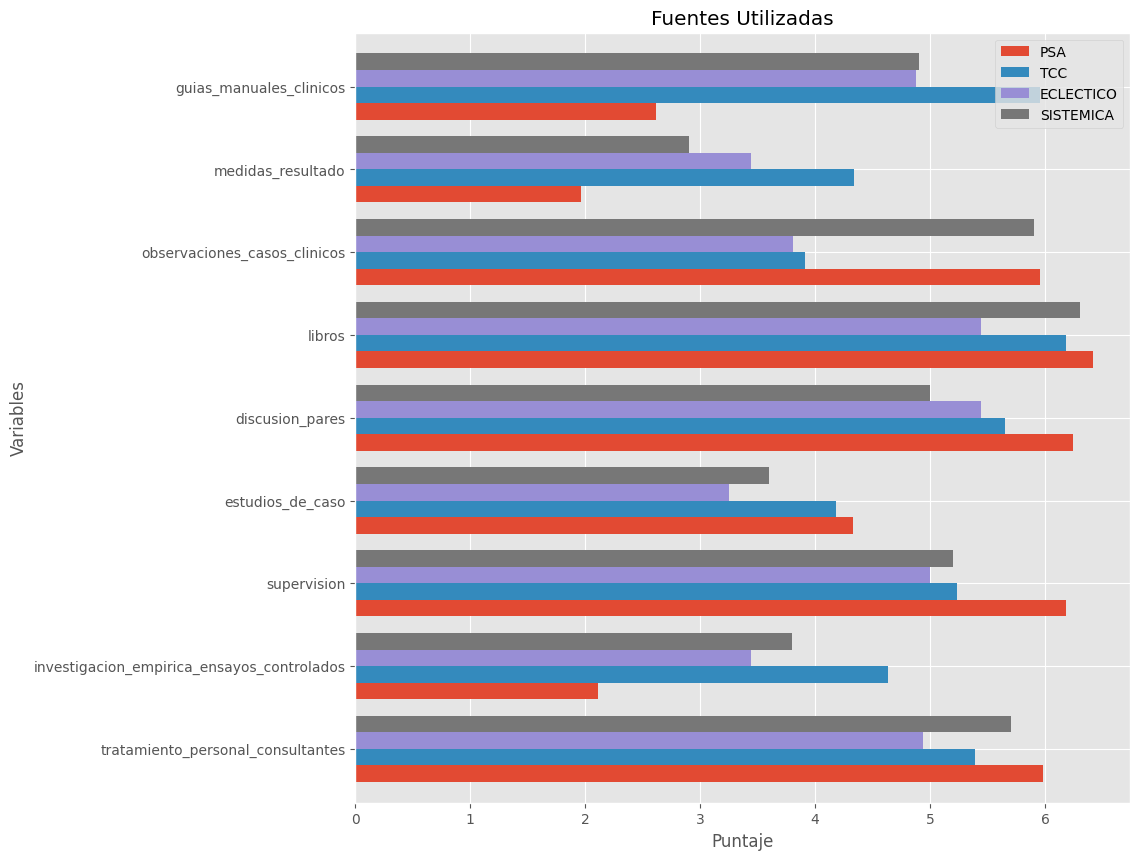

In [ ]:
ax = df3.plot(kind='barh', figsize=(10,10), width=0.8)

ax.set_xlabel('Puntaje')
ax.set_ylabel('Variables')
ax.set_title('Fuentes Utilizadas')
plt.show()

## Cuarta Sección

* 'apertura_terapias_desarrolladas_por_investigadores'

* 'actualizacion_info_cientifica'

* 'formacion_enfasis_investigacion'

* 'supervisores_terapia_evidencia_requerimiento'

* 'tratamientos_cientificos_eficientes'

* 'atraer_consultantes_con_tbe'

* 'hallazgos_cientificos_practica_diaria'

* 'nueva_terapia_intento'

* 'interes_aprender_tbe'

* 'tratamientos_utilizados_base_empirica'

* 'complejidad_consultantes_ensayos_clinicos'

* 'consultantes_prefieren_otros_tratamientos'

* 'terapia_manualizada'

* 'diagnosticos_utilizados_son_simples'

* 'tratamientos_preferencia_no_probados_ensayo_controlado'

* 'enfoque_tratamiento_individual'

* 'no_tiempo_aprender_tbe'

* 'capacitacion_tbe_demasiado_dinero'

* 'no_saber_tbe'

* 'entrenamiento_clinico_no_info_tbe'

* 'alianza_terapeutica_mas_importante'

* 'terapias_igualmente_efectivas'

* 'empleador_no_fondos_capacitacion_tbe'

* 'exp_clinica_+imp_que_evidencia_cientifica'

## Puntaje con 8

* 'actualizacion_info_cientifica'

* 'formacion_enfasis_investigacion'

* 'supervisores_terapia_evidencia_requerimiento'

* 'tratamientos_cientificos_eficientes'

* 'atraer_consultantes_con_tbe'

* 'hallazgos_cientificos_practica_diaria'

* interes_aprender_tbe

* tratamientos_utilizados_base_empirica

* complejidad_consultantes_ensayos_clinicos

* consultantes_prefieren_otros_tratamientos

* no_tiempo_aprender_tbe

* capacitacion_tbe_demasiado_dinero

* no_saber_tbe

* entrenamiento_clinico_no_info_tbe

* empleador_no_fondos_capacitacion_tbe

**INFO RESPUESTAS**

0 = No sabe no contesta

1 = Muy en desacuerdo

4 = Ni de acuerdo ni en desacuerdo

7 = Muy de acuerdo

8 = No aplica la pregunta, ya que no considero que haya UN tipo de método científico

### PSA

In [ ]:
fourth_section_psa = psa[['apertura_terapias_desarrolladas_por_investigadores',
                        'nueva_terapia_intento','terapia_manualizada',
                         'diagnosticos_utilizados_son_simples','tratamientos_preferencia_no_probados_ensayo_controlado',
                         'enfoque_tratamiento_individual','alianza_terapeutica_mas_importante',
                         'terapias_igualmente_efectivas','exp_clinica_+imp_que_evidencia_cientifica',
                          'actualizacion_info_cientifica',
                         'formacion_enfasis_investigacion','supervisores_terapia_evidencia_requerimiento',
                         'atraer_consultantes_con_tbe',
                         'hallazgos_cientificos_practica_diaria','interes_aprender_tbe',
                         'tratamientos_utilizados_base_empirica','complejidad_consultantes_ensayos_clinicos',
                         'consultantes_prefieren_otros_tratamientos',
                         'no_tiempo_aprender_tbe','capacitacion_tbe_demasiado_dinero',
                         'no_saber_tbe','entrenamiento_clinico_no_info_tbe',
                         'empleador_no_fondos_capacitacion_tbe']].mean()

### TCC

In [ ]:
fourth_section_tcc = tcc[['apertura_terapias_desarrolladas_por_investigadores',
                        'nueva_terapia_intento','terapia_manualizada',
                         'diagnosticos_utilizados_son_simples','tratamientos_preferencia_no_probados_ensayo_controlado',
                         'enfoque_tratamiento_individual','alianza_terapeutica_mas_importante',
                         'terapias_igualmente_efectivas','exp_clinica_+imp_que_evidencia_cientifica',
                          'actualizacion_info_cientifica',
                         'formacion_enfasis_investigacion','supervisores_terapia_evidencia_requerimiento',
                         'atraer_consultantes_con_tbe',
                         'hallazgos_cientificos_practica_diaria','interes_aprender_tbe',
                         'tratamientos_utilizados_base_empirica','complejidad_consultantes_ensayos_clinicos',
                         'consultantes_prefieren_otros_tratamientos',
                         'no_tiempo_aprender_tbe','capacitacion_tbe_demasiado_dinero',
                         'no_saber_tbe','entrenamiento_clinico_no_info_tbe',
                         'empleador_no_fondos_capacitacion_tbe']].mean()

### ECLECTICO

In [ ]:
fourth_section_eclectico = eclectico[['apertura_terapias_desarrolladas_por_investigadores',
                        'nueva_terapia_intento','terapia_manualizada',
                         'diagnosticos_utilizados_son_simples','tratamientos_preferencia_no_probados_ensayo_controlado',
                         'enfoque_tratamiento_individual','alianza_terapeutica_mas_importante',
                         'terapias_igualmente_efectivas','exp_clinica_+imp_que_evidencia_cientifica',
                          'actualizacion_info_cientifica',
                         'formacion_enfasis_investigacion','supervisores_terapia_evidencia_requerimiento',
                         'atraer_consultantes_con_tbe',
                         'hallazgos_cientificos_practica_diaria','interes_aprender_tbe',
                         'tratamientos_utilizados_base_empirica','complejidad_consultantes_ensayos_clinicos',
                         'consultantes_prefieren_otros_tratamientos',
                         'no_tiempo_aprender_tbe','capacitacion_tbe_demasiado_dinero',
                         'no_saber_tbe','entrenamiento_clinico_no_info_tbe',
                         'empleador_no_fondos_capacitacion_tbe']].mean()

### SISTEMICA

In [ ]:
fourth_section_sist = sist[['apertura_terapias_desarrolladas_por_investigadores',
                        'nueva_terapia_intento','terapia_manualizada',
                         'diagnosticos_utilizados_son_simples','tratamientos_preferencia_no_probados_ensayo_controlado',
                         'enfoque_tratamiento_individual','alianza_terapeutica_mas_importante',
                         'terapias_igualmente_efectivas','exp_clinica_+imp_que_evidencia_cientifica',
                          'actualizacion_info_cientifica',
                         'formacion_enfasis_investigacion','supervisores_terapia_evidencia_requerimiento',
                         'atraer_consultantes_con_tbe',
                         'hallazgos_cientificos_practica_diaria','interes_aprender_tbe',
                         'tratamientos_utilizados_base_empirica','complejidad_consultantes_ensayos_clinicos',
                         'consultantes_prefieren_otros_tratamientos',
                         'no_tiempo_aprender_tbe','capacitacion_tbe_demasiado_dinero',
                         'no_saber_tbe','entrenamiento_clinico_no_info_tbe',
                         'empleador_no_fondos_capacitacion_tbe']].mean()

# DF para Cuarta Section

In [ ]:
# dataframe for 3rd section
df4 = {
    'PSA': fourth_section_psa.round(2),
    'TCC': fourth_section_tcc.round(2),
    'ECLECTICO': fourth_section_eclectico.round(2),
    'SISTEMICA': fourth_section_sist.round(2)
}

df4 = pd.DataFrame(df4)
df4

,PSA,TCC,ECLECTICO,SISTEMICA
apertura_terapias_desarrolladas_por_investigadores,4.22,5.87,6.12,6.4
nueva_terapia_intento,4.04,4.66,4.56,3.0
terapia_manualizada,4.38,2.99,4.50,4.4
diagnosticos_utilizados_son_simples,3.49,3.70,4.25,2.3
tratamientos_preferencia_no_probados_ensayo_controlado,3.31,1.63,2.44,2.2
enfoque_tratamiento_individual,5.36,4.87,5.81,3.9
alianza_terapeutica_mas_importante,3.71,3.13,4.69,4.9
terapias_igualmente_efectivas,3.13,1.55,2.75,3.0
exp_clinica_+imp_que_evidencia_cientifica,4.82,2.60,4.38,3.0
actualizacion_info_cientifica,3.64,5.83,5.44,4.8


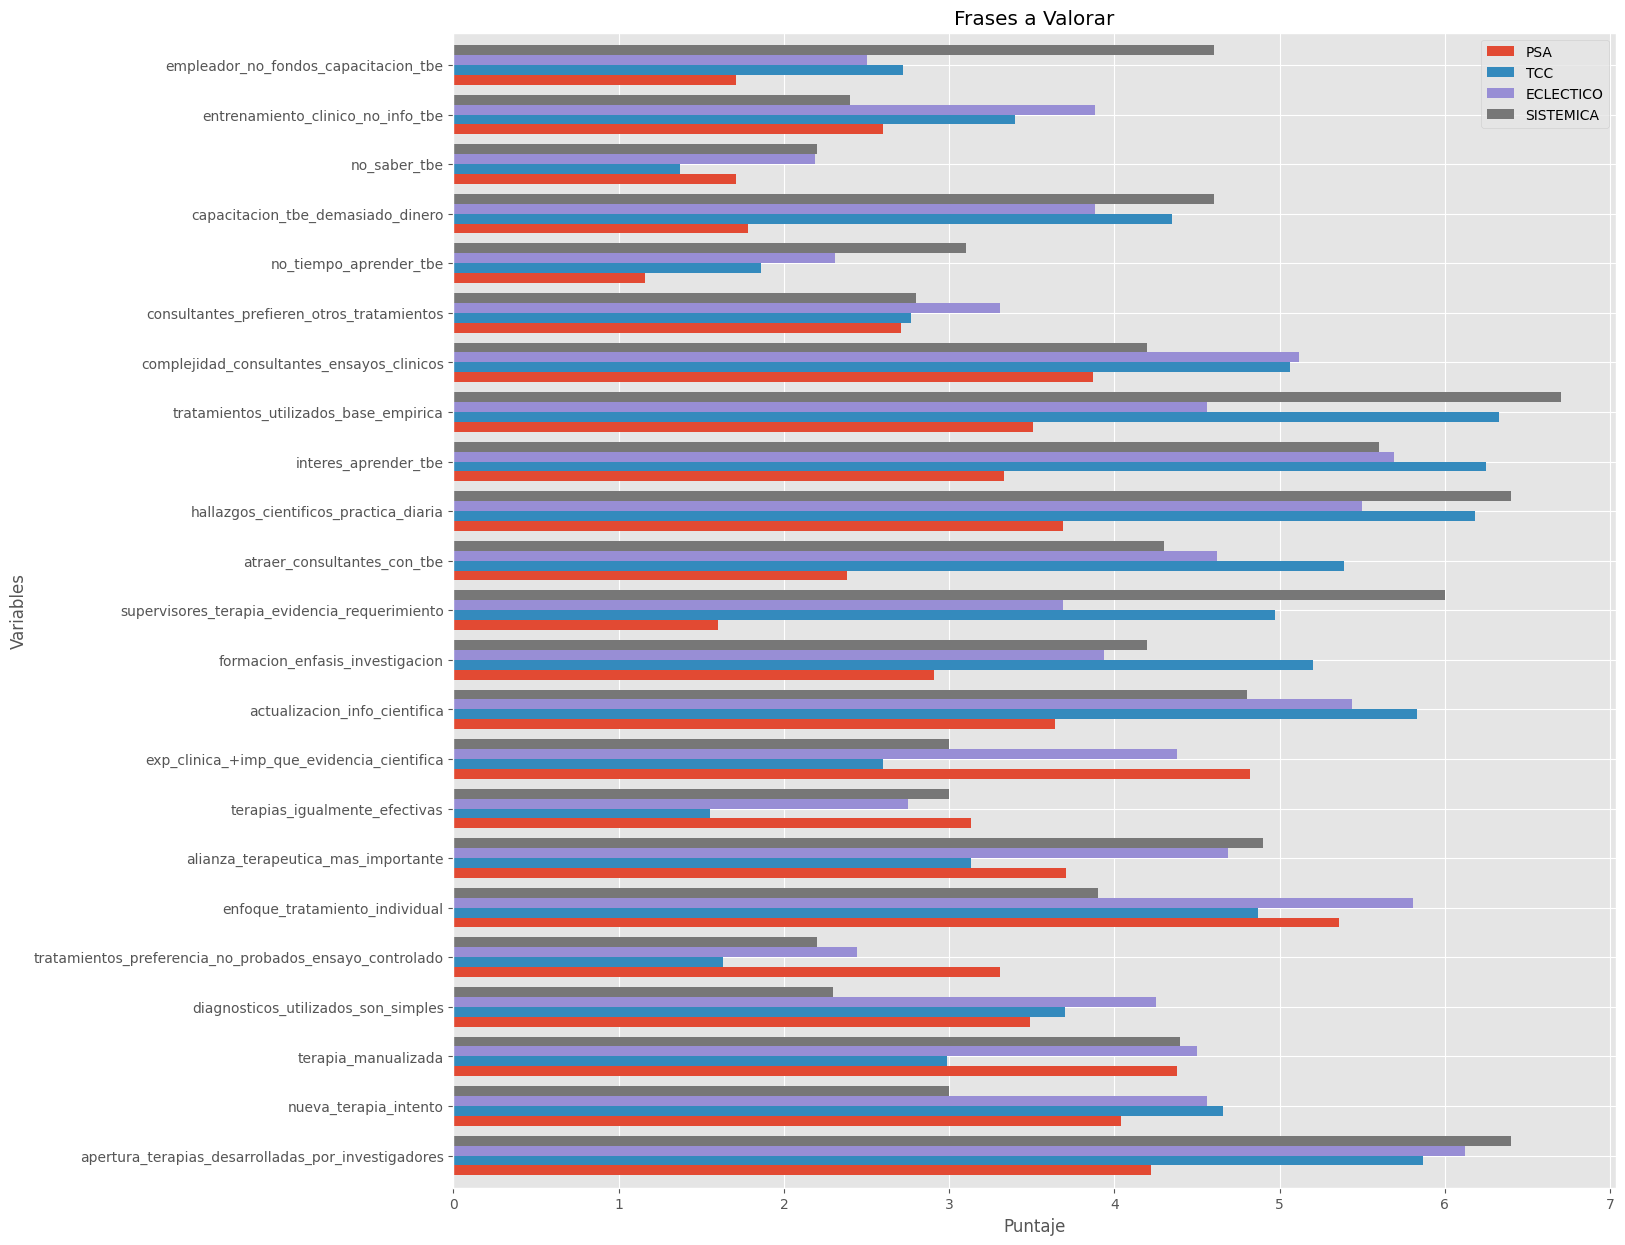

In [ ]:
ax = df4.plot(kind='barh', figsize=(15,15), width=0.8)

ax.set_xlabel('Puntaje')
ax.set_ylabel('Variables')
ax.set_title('Frases a Valorar')
plt.show()

## Consentimiento Informado

In [ ]:
ci_psa = psa['consentimiento_informado'].mean()
ci_tcc = tcc['consentimiento_informado'].mean()
ci_eclectico = eclectico['consentimiento_informado'].mean()
ci_sist = sist['consentimiento_informado'].mean()

print('CI PSA:',ci_psa)
print('CI TCC:',ci_tcc)
print('CI ELECTICO:',ci_eclectico)
print('CI SISTEMICA:',ci_sist)

CI PSA: 5.928571428571429
CI TCC: 6.075
CI ELECTICO: 5.538461538461538
CI SISTEMICA: 6.6


# ANÁLISIS ESTADÍSTICO